<a href="https://colab.research.google.com/github/SumayAlshokili/Artificial-Intelligence-and-Deep-Learning/blob/main/Fruit_Classification_Golden_Apples_and_Red_Apples_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Fruits/Train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Fruits/Test'    # Update with your actual path

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple_golden_1')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple_golden_2')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple_golden_3')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple_red_1')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple_red_2')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Test/apple_red_3')))




print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple_golden_1')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple_golden_2')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple_golden_3')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple_red_1')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple_red_2')))
print(len(os.listdir('/content/drive/MyDrive/Fruits/Train/apple_red_3')))

154
154
158
154
159
140
308
308
316
309
318
281


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./25,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=12,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 1475 images belonging to 6 classes.
Found 365 images belonging to 6 classes.


In [9]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 454s 9s/step - accuracy: 0.1676 - loss: -590417.1250 - val_accuracy: 0.1671 - val_loss: -286011008.0000
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 253s 5s/step - accuracy: 0.1565 - loss: -345195936.0000 - val_accuracy: 0.1671 - val_loss: -47999139840.0000
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.1660 - loss: -17783894016.0000 - val_accuracy: 0.1671 - val_loss: -1065068986368.0000
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 248s 5s/step - accuracy: 0.1510 - loss: -244565098496.0000 - val_accuracy: 0.1671 - val_loss: -9924725702656.0000
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 247s 5s/step - accuracy: 0.1710 - loss: -1855399526400.0000 - val_accuracy: 0.1671 - val_loss: -54514325389312.0000
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 265s 6s/step - accuracy: 0.1748 - loss: -9148228960256.0000 - val_accuracy: 0.1671 - val_loss: -209461343944704.0000
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 269s 6s/step - accuracy: 0.1598 - loss: -32951368679424.0000 - val_accur

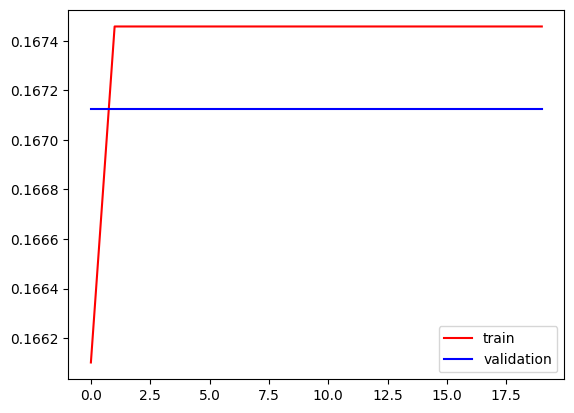

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

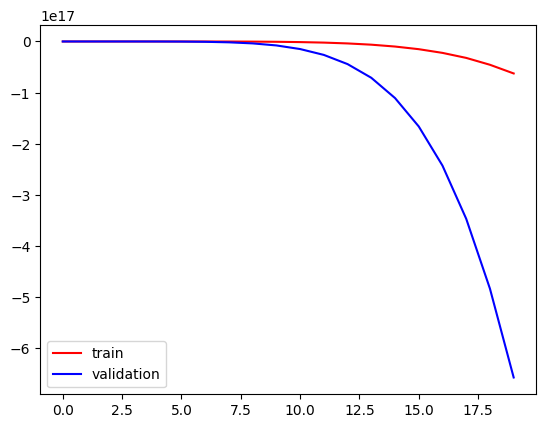

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 919 images belonging to 6 classes.


In [17]:
#predict the test data
predictions = model.predict(test_data)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 196s 7s/step


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[154   0   0   0   0   0]
 [154   0   0   0   0   0]
 [158   0   0   0   0   0]
 [154   0   0   0   0   0]
 [159   0   0   0   0   0]
 [140   0   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29       154
           1       0.00      0.00      0.00       154
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       159
           5       0.00      0.00      0.00       140

    accuracy                           0.17       919
   macro avg       0.03      0.17      0.05       919
weighted avg       0.03      0.17      0.05       919



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [11]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 404s 8s/step - accuracy: 0.1751 - loss: -17796.9629 - val_accuracy: 0.1671 - val_loss: 2417.5181
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.1725 - loss: -477905.4375 - val_accuracy: 0.1671 - val_loss: -19803.7598
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 444s 8s/step - accuracy: 0.2058 - loss: -3173060.2500 - val_accuracy: 0.1671 - val_loss: -786120.4375
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 489s 9s/step - accuracy: 0.1949 - loss: -12483901.0000 - val_accuracy: 0.1671 - val_loss: -8057388.0000
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 447s 9s/step - accuracy: 0.2140 - loss: -35707340.0000 - val_accuracy: 0.1671 - val_loss: -28148434.0000
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 499s 9s/step - accuracy: 0.1870 - loss: -83433584.0000 - val_accuracy: 0.1671 - val_loss: -99823008.0000
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 421s 9s/step - accuracy: 0.2111 - loss: -165194784.0000 - val_accuracy: 0.1671 - val_loss: -87103664.0000
Epoch 8/20
47/4

In [19]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 919 images belonging to 6 classes.


In [20]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step


In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[154   0   0   0   0   0]
 [154   0   0   0   0   0]
 [158   0   0   0   0   0]
 [154   0   0   0   0   0]
 [159   0   0   0   0   0]
 [140   0   0   0   0   0]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29       154
           1       0.00      0.00      0.00       154
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       159
           5       0.00      0.00      0.00       140

    accuracy                           0.17       919
   macro avg       0.03      0.17      0.05       919
weighted avg       0.03      0.17      0.05       919



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [23]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 536s 10s/step - accuracy: 0.1604 - loss: -401.0787 - val_accuracy: 0.1671 - val_loss: -4023.6768
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 451s 9s/step - accuracy: 0.1627 - loss: -3543.7842 - val_accuracy: 0.1671 - val_loss: -14992.6963
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 434s 9s/step - accuracy: 0.1650 - loss: -11378.1191 - val_accuracy: 0.1671 - val_loss: -34436.7227
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 412s 9s/step - accuracy: 0.1678 - loss: -23299.2832 - val_accuracy: 0.1671 - val_loss: -63021.7188
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 439s 9s/step - accuracy: 0.1575 - loss: -41032.8242 - val_accuracy: 0.1671 - val_loss: -100563.4062
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 413s 9s/step - accuracy: 0.1634 - loss: -64609.3164 - val_accuracy: 0.1671 - val_loss: -146600.8125
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 440s 9s/step - accuracy: 0.1531 - loss: -94340.7031 - val_accuracy: 0.1671 - val_loss: -200433.9531
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 441s 9s/step -

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[154   0   0   0   0   0]
 [154   0   0   0   0   0]
 [158   0   0   0   0   0]
 [154   0   0   0   0   0]
 [159   0   0   0   0   0]
 [140   0   0   0   0   0]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.17      1.00      0.29       154
           1       0.00      0.00      0.00       154
           2       0.00      0.00      0.00       158
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       159
           5       0.00      0.00      0.00       140

    accuracy                           0.17       919
   macro avg       0.03      0.17      0.05       919
weighted avg       0.03      0.17      0.05       919



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
